<a href="https://colab.research.google.com/github/Super-rookie-Py/_MachineLearning_Class/blob/main/%EB%B0%95%EA%B1%B4%EC%9A%B0_%EC%8B%A4%EC%A0%84_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

## 캐글에서 찾은 심부전증(heart failure)에 대한 데이터셋

- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### 컬럼 정보
- age: 나이
- anaemia: 빈혈증 여부
- creatinine_phosphokinase:  혈액 1리터에 들어있는 다양한 조직 및 세포 유형에 의해 발현되는 효소(CPK)의 수치 (mcg/L)
- diabetes: 당뇨병 여부
- ejection_fraction: 심장 수축시의 이동하는 혈액의 비율
- high_blood_pressure: 고혈압 여부
- platelets: 혈액속의 혈소판양 (kiloplatelets/mL)
- serum_creatinine: 혈액속의 크레아틴 양(mg/dL)
- serum_sodium: 혈액의 나트륨수치 (mEq/L)
- sex: 성별
- smoking: 흡연 여부
- time: 후속기간

- DEATH_EVENT: 사망 여부


In [3]:
heart = pd.read_csv("/content/gdrive/My Drive/heart_failure.csv")

heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
heart_data_df = heart.loc[:,"age":"time"]
heart_target_df = heart["DEATH_EVENT"]
display(heart_data_df)
display(heart_target_df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate , cross_val_score, train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [6]:
heart_data = heart_data_df.to_numpy()
heart_target = heart_target_df.to_numpy()
heart_data

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [7]:
heart_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(heart_data, heart_target, test_size = 0.2)

### SVC 분류(전처리 없이 진행)

In [9]:
model = SVC()

cross_val = cross_validate(
    estimator = model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.004380607604980468(+/-0.0013159046776902948
avg score time: 0.0012134552001953126(+/-0.0005279874816923539
avg test score: 0.6789265536723164(+/-0.006472811110088906


### SVC 전처리 후 

In [10]:
model = make_pipeline(
    StandardScaler(),
    SVC()
)

cross_val = cross_validate(
    estimator = model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.00344996452331543(+/-0.0006908725954621166
avg score time: 0.0008024692535400391(+/-3.93757215861103e-05
avg test score: 0.775593220338983(+/-0.04993870928244777


### bagging SVC

In [11]:
bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

cross_val = cross_validate(
    estimator = bagging_model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.029489660263061525(+/-0.00219334879202018
avg score time: 0.004488754272460938(+/-0.00024726746590331676
avg test score: 0.7389265536723164(+/-0.04312307655858768


### RandomForest 분류

In [12]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [13]:
cross_val = cross_validate(
    estimator = model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.13978242874145508(+/-0.0027653905149632933
avg score time: 0.00855259895324707(+/-0.001148842355111926
avg test score: 0.715593220338983(+/-0.12982276385273767


### Extremely Randomized Trees 분류

In [14]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [15]:
cross_val = cross_validate(
    estimator = model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.10456209182739258(+/-0.0031174154756566205
avg score time: 0.00859065055847168(+/-0.00012002952675094795
avg test score: 0.7255932203389831(+/-0.06189486647915897


### bagging을 사용한 KNN 분류

In [16]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

- base 모델 결과

In [17]:
cross_val = cross_validate(
    estimator = base_model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.0021853923797607424(+/-0.0017109447051619272
avg score time: 0.0030495643615722655(+/-0.0003989437331248998
avg test score: 0.7289830508474576(+/-0.029788855528371516


- bagging 모델 결과

In [18]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.01705799102783203(+/-0.0004152575097235208
avg score time: 0.008341503143310548(+/-0.000265510422981784
avg test score: 0.7389265536723164(+/-0.03761854977844534


### AdaBoost 분류

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [21]:
cross_val = cross_validate(
    estimator = model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.07447519302368164(+/-0.0023866961785940877
avg score time: 0.007260179519653321(+/-0.0008410626437890255
avg test score: 0.615593220338983(+/-0.09174441959380822


### Gradient Tree Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [24]:
cross_val = cross_validate(
    estimator = model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.09207668304443359(+/-0.002755431393931833
avg score time: 0.001070690155029297(+/-0.00039155533112944393
avg test score: 0.6289265536723164(+/-0.11662426556066792


### 투표기반 분류

In [25]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [26]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [("svc", model1), ("naive", model2), ("forest",model3)],
    voting = "hard"
)

- Hard voting

In [27]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, heart_data, heart_target, cv = 5)
  print("Accurarcy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accurarcy: 0.68 (+/- 0.01) [SVC]
Accurarcy: 0.75 (+/- 0.07) [GaussianNB]
Accurarcy: 0.69 (+/- 0.15) [RandomForestClassifier]
Accurarcy: 0.76 (+/- 0.08) [VotingClassifier]


In [28]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [("svc", model1), ("naive", model2), ("forest",model3)],
    voting = "soft",
    weights = [2, 1, 2]
)

- Soft voting

In [29]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, heart_data, heart_target, cv = 5)
  print("Accurarcy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accurarcy: 0.68 (+/- 0.01) [SVC]
Accurarcy: 0.75 (+/- 0.07) [GaussianNB]
Accurarcy: 0.70 (+/- 0.15) [RandomForestClassifier]
Accurarcy: 0.73 (+/- 0.08) [VotingClassifier]


### Stacking 분류

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [31]:
estimators = [("logistic", LogisticRegression(max_iter=10000)),
              ("svc", SVC()),
              ('naive', GaussianNB())]

In [32]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

In [33]:
cross_val = cross_validate(
    estimator = clf,
    X = heart_data, y=heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.2849752902984619(+/-0.01652439939442944
avg score time: 0.009258794784545898(+/-0.00019160046855493795
avg test score: 0.7689265536723163(+/-0.08240554094358885


### 결정경계 시각화

In [39]:
from itertools import product

In [35]:
X = heart_data[:, [0, 2]]
y = heart_target

In [36]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [37]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


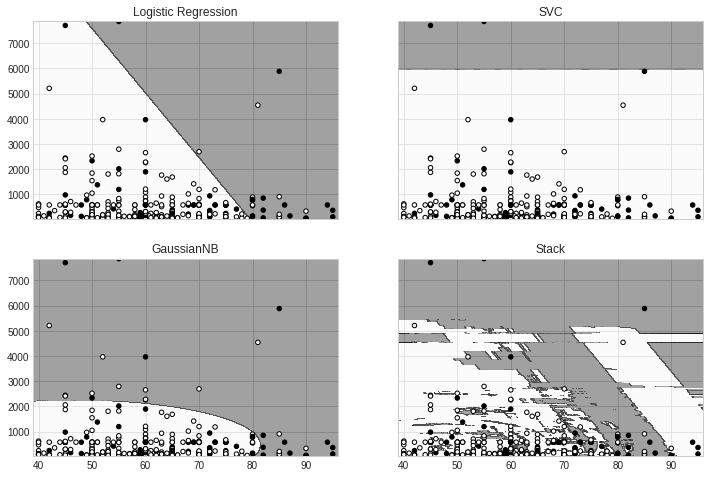

In [40]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack],
                          ["Logistic Regression", "SVC",
                           "GaussianNB", "Stack"]):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### Linear SVC

In [ ]:
from sklearn.manifold import TSNE

In [52]:
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear')
)

cross_val = cross_validate(
    estimator = model,
    X = heart_data, y= heart_target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))

avg fit time: 0.004883432388305664(+/-0.002193525958851133
avg score time: 0.0006702899932861328(+/-0.0001832255451551679
avg test score: 0.7922598870056496(+/-0.07800776746330146


In [53]:
X = heart_data
y = heart_target
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.8493723849372385
평가 데이터 점수: 0.8333333333333334


In [57]:
def make_meshgrid(x, y, h = 0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [58]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  out = plt.contourf(xx, yy, Z, **params)

  return out

In [59]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

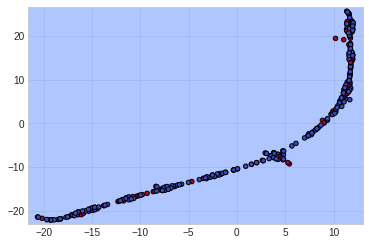

In [60]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap = plt.cm.coolwarm, s=20, edgecolors='k');

### SVC모델이 성능이 좋았으며 특히 linear SVC모델이 가장 성능이 우수했음